<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
# !pip install pandas 
# !pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Load the data
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
data = pd.read_csv(file_path)

In [3]:
# Make a copy of original data
df = data.copy()

In [4]:
# DATA WRANGLING

import numpy as np

# Add Age_Median column
age_map = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Median'] = df['Age'].map(age_map)

# Add MainBranch_Type column
mainbranch_map = {
    'I am a developer by profession': 'Professional',
    'I am learning to code': 'Learner',
    'I code primarily as a hobby': 'Hobbyist',
    'I am not primarily a developer, but I write code sometimes as part of my work/studies': 'Occasional',
    'I used to be a developer by profession, but no longer am': 'Former Professional'
}
df['MainBranch_Type'] = df['MainBranch'].map(mainbranch_map)

# Add TimeSearching_Median column
timesearching_map = {
    'Less than 15 minutes a day': 7,
    '15-30 minutes a day': 22,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 121
}
df['TimeSearching_Median'] = df['TimeSearching'].map(timesearching_map)
df['TimeSearching_Median'] = pd.to_numeric(df['TimeSearching_Median'], errors='coerce')

# Convert YearsCodePro to number
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year' : 17,
    'More than 50 years' : 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Add YearsCodePro_Level column
def convert_experience(val):
    if val == 'None' or pd.isna(val):
        return np.nan
    if val <= 2:
        return 'Beginner (0-2)'
    elif val <= 5:
        return 'Junior (3-5)'
    elif val <= 10:
        return 'Mid (6-10)'
    elif val <= 20:
        return 'Senior (11-20)'
    else:
        return 'Veteran (21+)'
df['YearsCodePro_Level'] = df['YearsCodePro'].apply(convert_experience)

# Add JobSatPoints_6_Level column
def categorize_jobsat(val):
    if pd.isna(val):
        return np.nan
    elif val <= 14:
        return 'Very Low (0–14)'
    elif val <= 29:
        return 'Low (15–29)'
    elif val <= 44:
        return 'Fair (30–44)'
    elif val <= 59:
        return 'Moderate (45–59)'
    elif val <= 74:
        return 'High (60–74)'
    elif val <= 89:
        return 'Very High (75–89)'
    else:
        return 'Extremely High (90+)'
df['JobSatPoints_6_Level'] = df['JobSatPoints_6'].apply(categorize_jobsat)

# Standardize Country column
country_mapping = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Iran, Islamic Republic of...': 'Iran',
    'Republic of North Macedonia': 'North Macedonia',
    'United Republic of Tanzania': 'Tanzania',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    'Bosnia and Herzegovina': 'Bosnia',
    'Hong Kong (S.A.R.)': 'Hong Kong',
    "Lao People's Democratic Republic": 'Laos',
    'Democratic Republic of the Congo': 'DR Congo',
    "Côte d'Ivoire": "Ivory Coast",
    "Democratic People's Republic of Korea": 'North Korea',
    'Congo, Republic of the...': 'Republic of Congo',
    'Guinea-Bissau': 'Guinea-Bissau',
    'Central African Republic': 'CAR',
    'Libyan Arab Jamahiriya': 'Libya',
    'Saint Kitts and Nevis': 'St. Kitts & Nevis',
    'Micronesia, Federated States of...': 'Micronesia'
}
df['Country'] = df['Country'].replace(country_mapping)

# Standardize EdLevel column
edlevel_mapping = {
    'Primary/elementary school': 'Primary School',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'High School',
    'Some college/university study without earning a degree': 'Some College',
    'Associate degree (A.A., A.S., etc.)': 'Associate Degree',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s Degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s Degree',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Doctorate or Professional Degree',
    'Something else': 'Other'
}
df['EdLevel'] = df['EdLevel'].replace(edlevel_mapping)

### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



In [5]:
df_stk = df.groupby('Age_Median')[['JobSatPoints_6', 'JobSatPoints_7']].median()
df_stk

,JobSatPoints_6,JobSatPoints_7
Age_Median,,
10.0,1.5,5.0
20.0,15.0,20.0
30.0,20.0,15.0
40.0,20.0,15.0
50.0,20.0,15.0
60.0,20.0,20.0
70.0,20.0,15.0


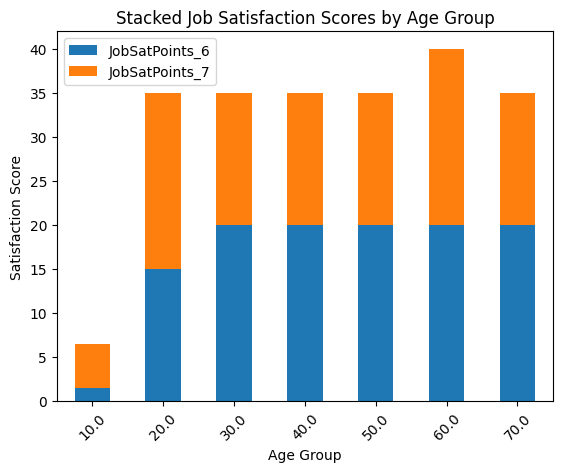

In [6]:
df_stk.plot(kind='bar', stacked=True)
plt.title('Stacked Job Satisfaction Scores by Age Group')
plt.ylabel('Satisfaction Score')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


In [7]:
top5 = df['Employment'].value_counts().head().index.tolist()
df_stk = df[df['Employment'].isin(top5)]
df_stk = df_stk.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()
df_stk

,JobSatPoints_6,JobSatPoints_7
Employment,,
"Employed, full-time",20.0,15.0
"Employed, full-time;Independent contractor, freelancer, or self-employed",15.0,15.0
"Independent contractor, freelancer, or self-employed",20.0,10.0
"Not employed, but looking for work",20.0,20.0
"Student, full-time",NaN,NaN


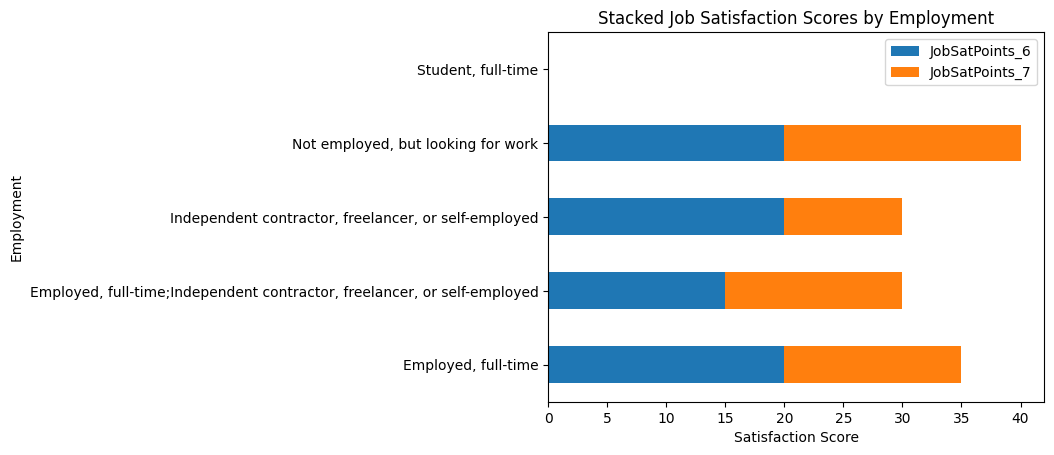

In [8]:
df_stk.plot(kind='barh', stacked=True)
plt.title('Stacked Job Satisfaction Scores by Employment')
plt.xlabel('Satisfaction Score')
plt.ylabel('Employment')
plt.xticks()
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


In [9]:
df_stk = pd.crosstab(df['Age'], df['JobSatPoints_6_Level'], values=df['ConvertedCompYearly'], aggfunc='sum').fillna(0)
df_stk

JobSatPoints_6_Level,Extremely High (90+),Fair (30–44),High (60–74),Low (15–29),Moderate (45–59),Very High (75–89),Very Low (0–14)
Age,,,,,,,
18-24 years old,15645583.0,12626412.0,3121058.0,20792765.0,3373141.0,2314411.0,38757312.0
25-34 years old,38338571.0,86128872.0,20150984.0,175043787.0,26645626.0,18152921.0,214346120.0
35-44 years old,13970925.0,75968200.0,14180462.0,142142314.0,23905374.0,16221216.0,173061807.0
45-54 years old,3326470.0,28446239.0,4866231.0,55014058.0,7206208.0,2428869.0,76793748.0
55-64 years old,1897554.0,11396360.0,2726664.0,18396633.0,5233551.0,1590664.0,25600990.0
65 years or older,0.0,1692601.0,364393.0,1608966.0,529731.0,109039.0,2580393.0
Prefer not to say,0.0,0.0,0.0,340000.0,384125.0,0.0,393917.0
Under 18 years old,12183.0,38434.0,24332.0,22257.0,0.0,40000.0,318136.0


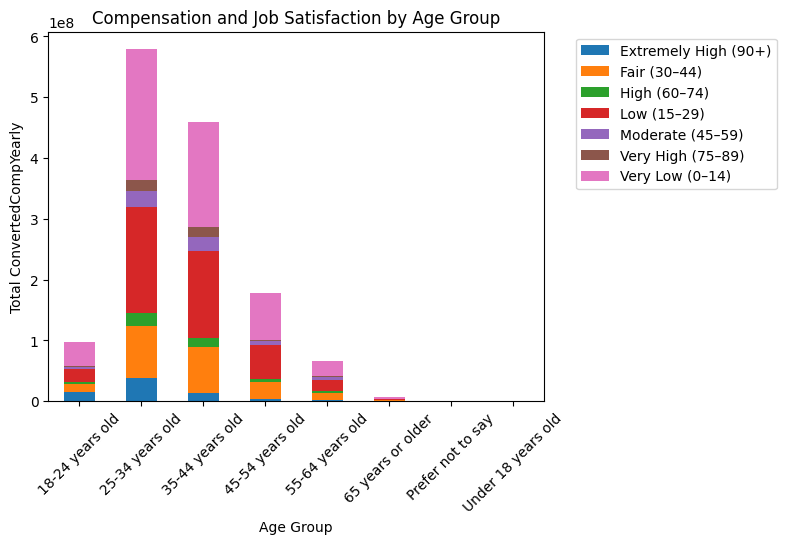

In [10]:
df_stk.plot(kind='bar', stacked=True)
plt.title('Compensation and Job Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total ConvertedCompYearly')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


In [11]:
df_stk = pd.crosstab(df['Age'], df['JobSatPoints_6_Level'], values=df['ConvertedCompYearly'], aggfunc='median').fillna(0)
df_stk

JobSatPoints_6_Level,Extremely High (90+),Fair (30–44),High (60–74),Low (15–29),Moderate (45–59),Very High (75–89),Very Low (0–14)
Age,,,,,,,
18-24 years old,14150.0,32222.0,20010.5,32222.0,23549.0,15759.5,24731.0
25-34 years old,37026.0,66417.0,53703.0,67180.0,64444.0,37937.5,57999.0
35-44 years old,64875.5,88073.0,76379.0,90110.5,85000.0,73885.0,81629.0
45-54 years old,57247.5,102270.0,100000.0,107406.0,101833.5,78731.5,98549.0
55-64 years old,115000.0,124258.5,165000.0,130000.0,120000.0,107700.0,105000.0
65 years or older,0.0,107330.5,91523.5,129642.5,101000.0,109039.0,150000.0
Prefer not to say,0.0,0.0,0.0,170000.0,192062.5,0.0,101713.0
Under 18 years old,6091.5,7253.0,8661.0,11128.5,0.0,20000.0,8913.0


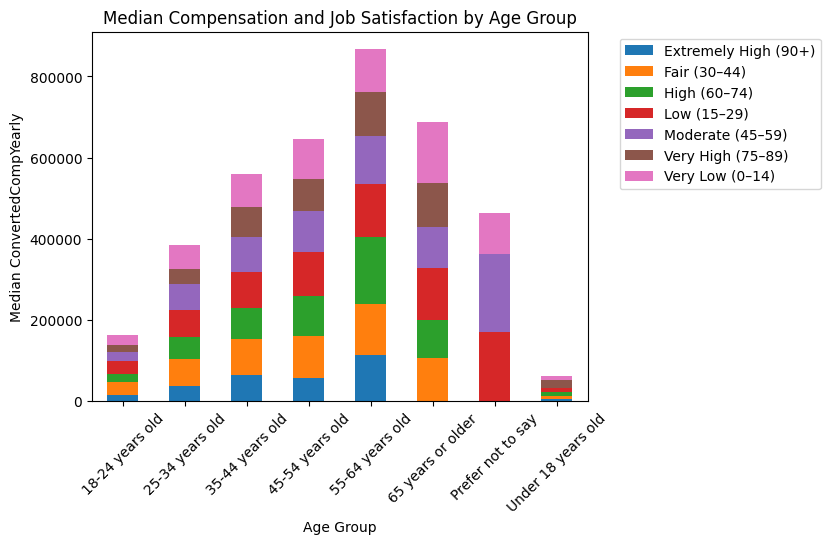

In [12]:
df_stk.plot(kind='bar', stacked=True)
plt.title('Median Compensation and Job Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median ConvertedCompYearly')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


In [13]:
top5 = df['DatabaseWantToWorkWith'].value_counts().head().index.tolist()
df_stk = df[df['DatabaseWantToWorkWith'].isin(top5)]
df_stk = pd.crosstab(df_stk['Age'], df_stk['DatabaseWantToWorkWith'], normalize='index')
df_stk

DatabaseWantToWorkWith,Microsoft SQL Server,MySQL,PostgreSQL,PostgreSQL;SQLite,SQLite
Age,,,,,
18-24 years old,0.076423,0.155014,0.409214,0.185366,0.173984
25-34 years old,0.128252,0.107078,0.442529,0.173321,0.148820
35-44 years old,0.179394,0.103028,0.409399,0.162675,0.145504
45-54 years old,0.269307,0.100990,0.363366,0.140594,0.125743
55-64 years old,0.334694,0.132653,0.283673,0.108163,0.140816
65 years or older,0.188034,0.282051,0.188034,0.085470,0.256410
Prefer not to say,0.121212,0.181818,0.303030,0.242424,0.151515
Under 18 years old,0.023102,0.214521,0.250825,0.148515,0.363036


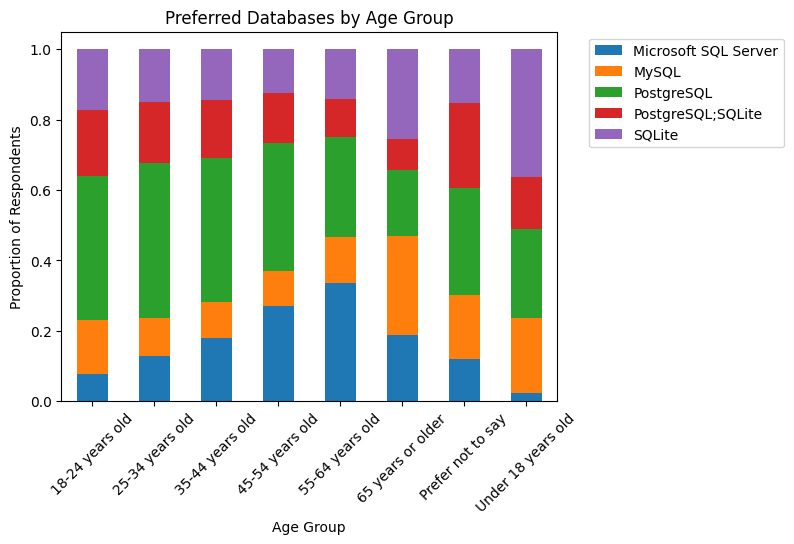

In [14]:
df_stk.plot(kind='bar', stacked=True)
plt.title("Preferred Databases by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion of Respondents")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


In [15]:
top5 = df['Employment'].value_counts().head().index.tolist()
df_stk = df[df['Employment'].isin(top5)]
df_stk = pd.crosstab(df_stk['JobSatPoints_6_Level'], df_stk['Employment'])
df_stk

Employment,"Employed, full-time","Employed, full-time;Independent contractor, freelancer, or self-employed","Independent contractor, freelancer, or self-employed","Not employed, but looking for work"
JobSatPoints_6_Level,,,,
Extremely High (90+),1315,166,100,0
Fair (30–44),3192,258,175,0
High (60–74),891,71,40,0
Low (15–29),5862,579,302,1
Moderate (45–59),1110,97,48,0
Very High (75–89),752,81,31,0
Very Low (0–14),9646,1051,564,0


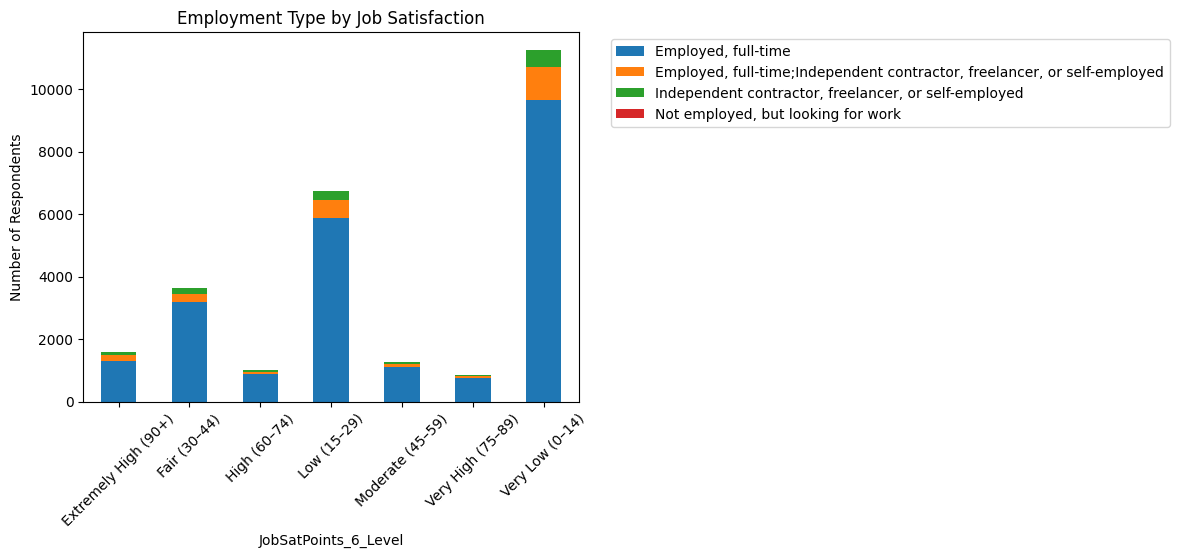

In [16]:
df_stk.plot(kind='bar', stacked=True)
plt.title("Employment Type by Job Satisfaction")
plt.xlabel("JobSatPoints_6_Level")
plt.ylabel("Number of Respondents")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


In [17]:
top5 = df['LanguageAdmired'].value_counts().head().index.tolist()
df_stk = df[df['LanguageAdmired'].isin(top5)]
df_stk = pd.crosstab(df_stk['Age'], df_stk['LanguageAdmired'])
df_stk

LanguageAdmired,C#,HTML/CSS;JavaScript;TypeScript,Java,Python,Python;SQL
Age,,,,,
18-24 years old,119,191,94,279,101
25-34 years old,332,538,231,602,318
35-44 years old,264,254,153,364,151
45-54 years old,107,51,64,132,58
55-64 years old,34,5,19,60,24
65 years or older,11,1,8,27,5
Prefer not to say,2,0,1,10,2
Under 18 years old,23,18,13,81,10


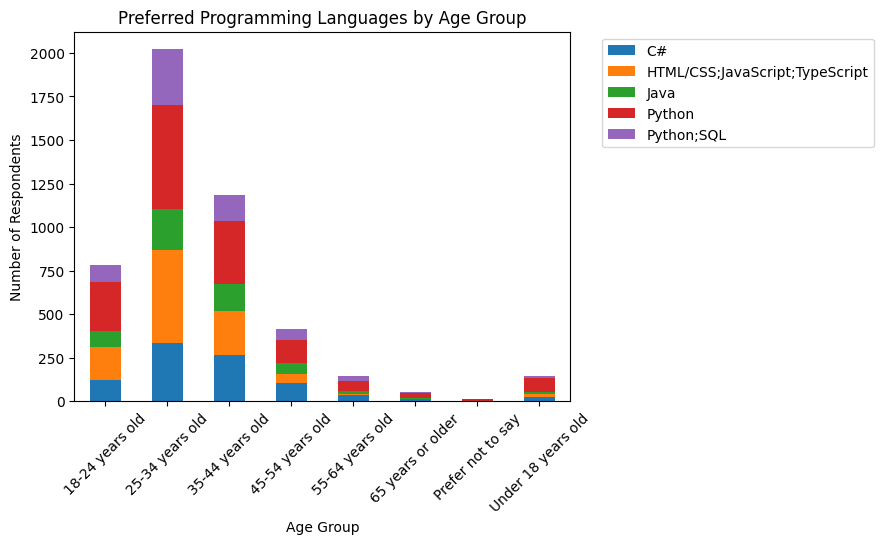

In [18]:
df_stk.plot(kind='bar', stacked=True)
plt.title("Preferred Programming Languages by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [19]:
top_emp = df['Employment'].value_counts().head().index.tolist()
top_pf = df['PlatformAdmired'].value_counts().head().index.tolist()
df_stk = df[df['Employment'].isin(top_emp)]
df_stk = df_stk[df_stk['PlatformAdmired'].isin(top_pf)]
df_stk = pd.crosstab(df_stk['Employment'], df_stk['PlatformAdmired'])
df_stk

PlatformAdmired,Amazon Web Services (AWS),Amazon Web Services (AWS);Google Cloud,Amazon Web Services (AWS);Microsoft Azure,Google Cloud,Microsoft Azure
Employment,,,,,
"Employed, full-time",4739,571,630,1094,2788
"Employed, full-time;Independent contractor, freelancer, or self-employed",310,52,88,87,185
"Independent contractor, freelancer, or self-employed",377,56,74,121,219
"Not employed, but looking for work",177,28,24,57,48
"Student, full-time",97,14,10,109,43


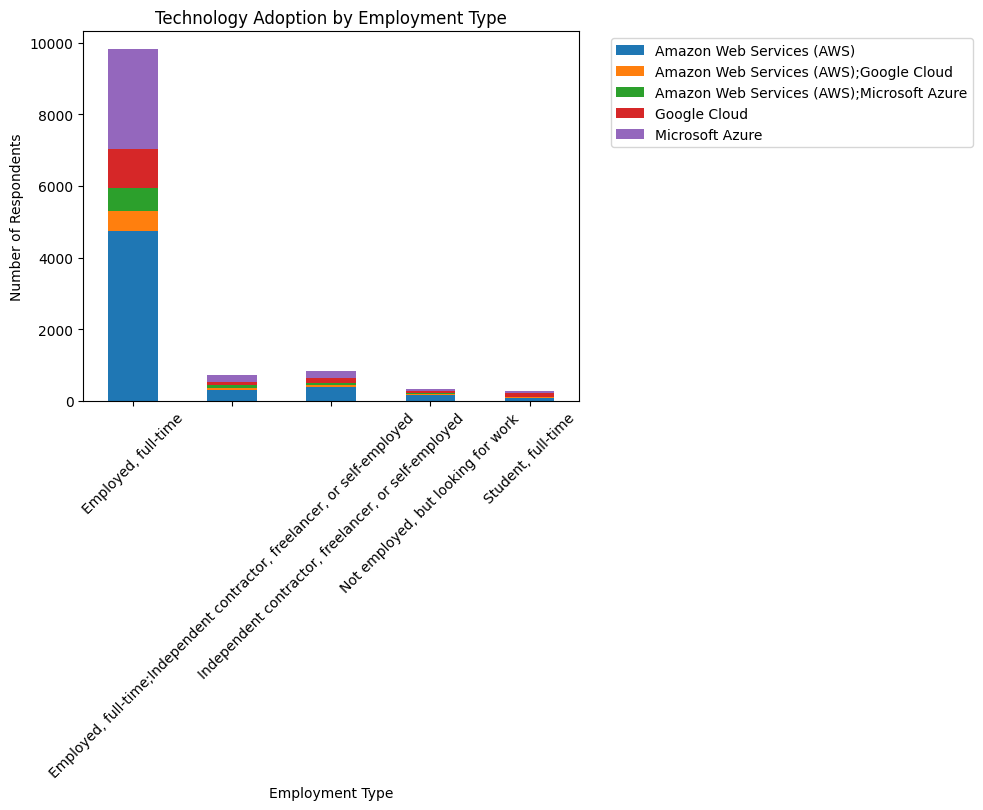

In [20]:
df_stk.plot(kind='bar', stacked=True)
plt.title("Technology Adoption by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Number of Respondents")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
